In [1]:
from matplotlib import pyplot as plt
from matplotlib import cm
import pandas as pd
from pprint import pprint
from random import randint, gauss
import numpy as np
#import matplotlib as mpl
#mpl.rcParams['text.usetex'] = True
#mpl.rcParams['text.latex.unicode'] = True

blues = cm.get_cmap(plt.get_cmap('Blues'))
greens = cm.get_cmap(plt.get_cmap('Greens'))
reds = cm.get_cmap(plt.get_cmap('Reds'))
oranges = cm.get_cmap(plt.get_cmap('Oranges'))
purples = cm.get_cmap(plt.get_cmap('Purples'))
greys = cm.get_cmap(plt.get_cmap('Greys'))
set1 = cm.get_cmap(plt.get_cmap('Set1'))
tab20 = cm.get_cmap(plt.get_cmap('tab20'))

def tableau20(color):
    # Use coordinated colors. These are the "Tableau 20" colors as
    # RGB. Each pair is strong/light. For a theory of color
    tableau20 = [(31 , 119, 180), (174, 199, 232), # blue        [ 0,1 ]
                 (255, 127, 14 ), (255, 187, 120), # orange      [ 2,3 ]
                 (44 , 160, 44 ), (152, 223, 138), # green       [ 4,5 ]
                 (214, 39 , 40 ), (255, 152, 150), # red         [ 6,7 ]
                 (148, 103, 189), (197, 176, 213), # purple      [ 8,9 ]
                 (140, 86 , 75 ), (196, 156, 148), # brown       [10,11]
                 (227, 119, 194), (247, 182, 210), # pink        [12,13]
                 (188, 189, 34 ), (219, 219, 141), # yellow      [14,15]
                 (23 , 190, 207), (158, 218, 229), # cyan        [16,17]
                 (65 , 68 , 81 ), (96 , 99 , 106), # gray        [18,19]
                 (127, 127, 127), (143, 135, 130), # gray        [20,21]
                 (165, 172, 175), (199, 199, 199), # gray        [22,23]
                 (207, 207, 207)]                   # gray        [24]
    # Scale the RGB values to the [0, 1] range, which is the format
    # matplotlib accepts.
    r, g, b = tableau20[color]
    return (round(r/255.,1), round(g/255.,1), round(b/255.,1))

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import warnings
warnings.filterwarnings('ignore')

In [2]:
StHeteroCampaigns_4DynHeteroResourcesHEFT = pd.read_csv('../Data/heft/StHeteroCampaigns_4DynHeteroResourcesHEFT_new.csv')
StHeteroCampaigns_4DynHeteroResourcesL2FF = pd.read_csv('../Data/l2ff//StHeteroCampaigns_4DynHeteroResourcesL2FF_new.csv')
StHeteroCampaigns_4DynHeteroResourcesGA50 = pd.read_csv('../Data/ga/perc_050//StHeteroCampaigns_4DynHeteroResourcesGA50_new.csv')
StHeteroCampaigns_4DynHeteroResourcesRAND = pd.read_csv('../Data/random/StHeteroCampaigns_4DynHeteroResourcesRAND_new.csv')

StHeteroCampaigns_4DynHeteroResourcesHEFT['mpn_snt_norm'] = StHeteroCampaigns_4DynHeteroResourcesHEFT['mpn_snt'] / StHeteroCampaigns_4DynHeteroResourcesHEFT['expected']
StHeteroCampaigns_4DynHeteroResourcesL2FF['mpn_snt_norm'] = StHeteroCampaigns_4DynHeteroResourcesL2FF['mpn_snt'] / StHeteroCampaigns_4DynHeteroResourcesL2FF['expected']
StHeteroCampaigns_4DynHeteroResourcesGA50['mpn_snt_norm'] = StHeteroCampaigns_4DynHeteroResourcesGA50['mpn_snt'] / StHeteroCampaigns_4DynHeteroResourcesGA50['expected']
StHeteroCampaigns_4DynHeteroResourcesRAND['mpn_snt_norm'] = StHeteroCampaigns_4DynHeteroResourcesRAND['mpn_snt'] / StHeteroCampaigns_4DynHeteroResourcesRAND['expected']

StHeteroCampaigns_4DynHeteroResourcesHEFT = StHeteroCampaigns_4DynHeteroResourcesHEFT.groupby(by=['size'])
StHeteroCampaigns_4DynHeteroResourcesHEFT_means = StHeteroCampaigns_4DynHeteroResourcesHEFT.mean()
StHeteroCampaigns_4DynHeteroResourcesHEFT_stds = StHeteroCampaigns_4DynHeteroResourcesHEFT.std()
StHeteroCampaigns_4DynHeteroResourcesL2FF = StHeteroCampaigns_4DynHeteroResourcesL2FF.groupby(by=['size'])
StHeteroCampaigns_4DynHeteroResourcesL2FF_means = StHeteroCampaigns_4DynHeteroResourcesL2FF.mean()
StHeteroCampaigns_4DynHeteroResourcesL2FF_stds = StHeteroCampaigns_4DynHeteroResourcesL2FF.std()
StHeteroCampaigns_4DynHeteroResourcesGA50 = StHeteroCampaigns_4DynHeteroResourcesGA50.groupby(by=['size'])
StHeteroCampaigns_4DynHeteroResourcesGA50_means = StHeteroCampaigns_4DynHeteroResourcesGA50.mean()
StHeteroCampaigns_4DynHeteroResourcesGA50_stds = StHeteroCampaigns_4DynHeteroResourcesGA50.std()
StHeteroCampaigns_4DynHeteroResourcesRAND = StHeteroCampaigns_4DynHeteroResourcesRAND.groupby(by=['size'])
StHeteroCampaigns_4DynHeteroResourcesRAND_means = StHeteroCampaigns_4DynHeteroResourcesRAND.mean()
StHeteroCampaigns_4DynHeteroResourcesRAND_stds = StHeteroCampaigns_4DynHeteroResourcesRAND.std()


In [3]:
#print('Means')
#print(HomogeResources_StHomogeCampaigns_makespan_means/1000)
#print('STD')
#print(HomogeResources_StHomogeCampaigns_makespan_stds/1000)

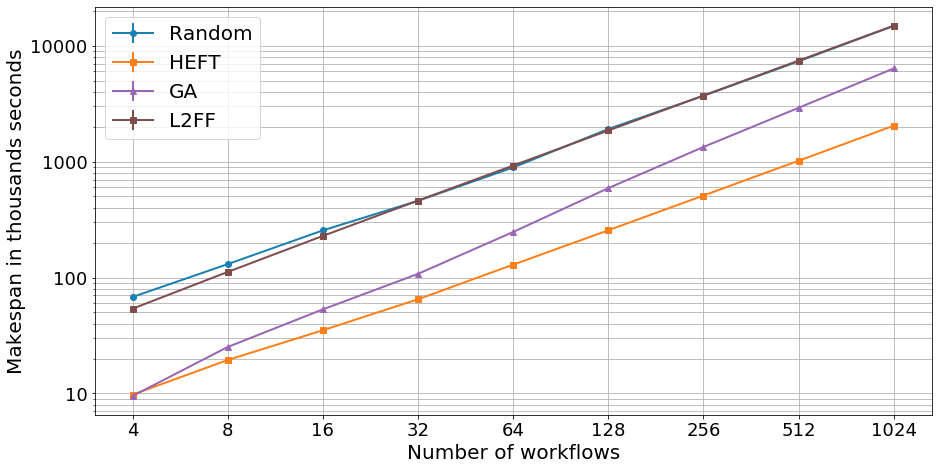

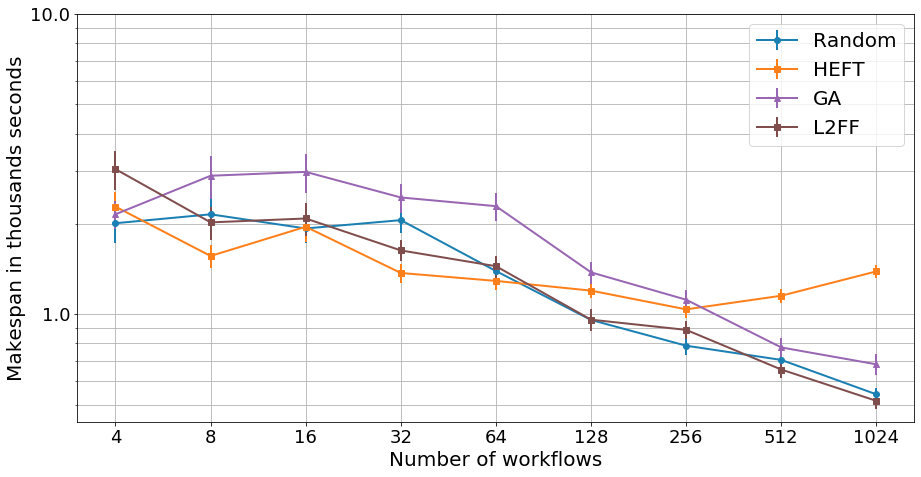

In [8]:
fig,axis = plt.subplots(nrows=1,ncols=1,figsize=(15,7.5))
_ = axis.errorbar(StHeteroCampaigns_4DynHeteroResourcesRAND_means.index, StHeteroCampaigns_4DynHeteroResourcesRAND_means['makespan'].values, StHeteroCampaigns_4DynHeteroResourcesRAND_stds['makespan'].values / 10, color=tableau20(0),marker='o',label='Random',linewidth=2)
_ = axis.errorbar(StHeteroCampaigns_4DynHeteroResourcesHEFT_means.index, StHeteroCampaigns_4DynHeteroResourcesHEFT_means['makespan'].values, StHeteroCampaigns_4DynHeteroResourcesHEFT_stds['makespan'].values / 10, marker='s',label='HEFT', color=tableau20(2),linewidth=2)
_ = axis.errorbar(StHeteroCampaigns_4DynHeteroResourcesGA50_means.index, StHeteroCampaigns_4DynHeteroResourcesGA50_means['makespan'].values, StHeteroCampaigns_4DynHeteroResourcesGA50_stds['makespan'].values / 10, color=tableau20(8),marker='^',label='GA',linewidth=2)
_ = axis.errorbar(StHeteroCampaigns_4DynHeteroResourcesL2FF_means.index, StHeteroCampaigns_4DynHeteroResourcesL2FF_means['makespan'].values, StHeteroCampaigns_4DynHeteroResourcesL2FF_stds['makespan'].values / 10, marker='s',label='L2FF', color=tableau20(10),linewidth=2)
# _ = axis.errorbar([4, 8, 16, 32, 64, 128], ideal, linestyle='--',label='Expected', color=greys(150),linewidth=2)
# _ = axis.fill_between(workflows_sizes, min_vals, max_vals, color=greens(250), alpha=0.2, label='RANDOM Max-Min')
_ = axis.set_yscale('log')
_ = axis.set_xscale('symlog',basex=2)
_ = axis.set_ylabel('Makespan in thousands seconds',fontsize=20)
_ = axis.set_xlabel('Number of workflows',fontsize=20)
_ = axis.set_xticklabels(axis.get_xticks().astype('int').tolist(),fontsize=18)
_ = axis.set_yticklabels((axis.get_yticks()/1000).astype('int').tolist(),fontsize=18)
_ = axis.grid('on', which='both')
#_ = axis.set_title('As a function of the number of resources', fontsize=22)
_ = axis.legend(fontsize=20)
#_ = fig.savefig('../Figures/StHomoResources_StHomoCampaigns.pdf',bbox_inches='tight')
#fig.savefig('StHomoResources_StHomoCampaigns.pdf',bbox_inches='tight')

fig,axis = plt.subplots(nrows=1,ncols=1,figsize=(15,7.5))
_ = axis.errorbar(StHeteroCampaigns_4DynHeteroResourcesRAND_means.index, StHeteroCampaigns_4DynHeteroResourcesRAND_means['mpn_snt_norm'].values, StHeteroCampaigns_4DynHeteroResourcesRAND_stds['mpn_snt_norm'].values / 10, color=tableau20(0),marker='o',label='Random',linewidth=2)
_ = axis.errorbar(StHeteroCampaigns_4DynHeteroResourcesHEFT_means.index, StHeteroCampaigns_4DynHeteroResourcesHEFT_means['mpn_snt_norm'].values, StHeteroCampaigns_4DynHeteroResourcesHEFT_stds['mpn_snt_norm'].values / 10, marker='s',label='HEFT', color=tableau20(2),linewidth=2)
_ = axis.errorbar(StHeteroCampaigns_4DynHeteroResourcesGA50_means.index, StHeteroCampaigns_4DynHeteroResourcesGA50_means['mpn_snt_norm'].values, StHeteroCampaigns_4DynHeteroResourcesGA50_stds['mpn_snt_norm'].values / 10, color=tableau20(8),marker='^',label='GA',linewidth=2)
_ = axis.errorbar(StHeteroCampaigns_4DynHeteroResourcesL2FF_means.index, StHeteroCampaigns_4DynHeteroResourcesL2FF_means['mpn_snt_norm'].values, StHeteroCampaigns_4DynHeteroResourcesL2FF_stds['mpn_snt_norm'].values / 10, marker='s',label='L2FF', color=tableau20(10),linewidth=2)
# _ = axis.errorbar([4, 8, 16, 32, 64, 128], ideal, linestyle='--',label='Expected', color=greys(150),linewidth=2)
# _ = axis.fill_between(workflows_sizes, min_vals, max_vals, color=greens(250), alpha=0.2, label='RANDOM Max-Min')
_ = axis.set_yscale('log')
_ = axis.set_xscale('symlog',basex=2)
_ = axis.set_yticks([0.01,0.1])
_ = axis.set_ylabel('Makespan in thousands seconds',fontsize=20)
_ = axis.set_xlabel('Number of workflows',fontsize=20)
_ = axis.set_xticklabels(axis.get_xticks().astype('int').tolist(),fontsize=18)
_ = axis.set_yticklabels(axis.get_yticks() * 100,fontsize=18)
_ = axis.grid('on', which='both')
#_ = axis.set_title('As a function of the number of resources', fontsize=22)
_ = axis.legend(fontsize=20)
#_ = fig.savefig('../Figures/StHomoResources_StHomoCampaigns.pdf',bbox_inches='tight')
#fig.savefig('StHomoResources_StHomoCampaigns.pdf',bbox_inches='tight')

In [9]:
DynHeteroResources_StHeteroCampaignsHEFT = pd.read_csv('../Data/heft/DynHeteroResources_StHeteroCampaignsHEFT_new.csv')
DynHeteroResources_StHeteroCampaignsL2FF = pd.read_csv('../Data/l2ff/DynHeteroResources_StHeteroCampaignsL2FF_new.csv')
DynHeteroResources_StHeteroCampaignsGA50 = pd.read_csv('../Data/ga/perc_050/DynHeteroResources_StHeteroCampaignsGA50_new.csv')
DynHeteroResources_StHeteroCampaignsRAND = pd.read_csv('../Data/random/DynHeteroResources_StHeteroCampaignsRAND_new.csv')

DynHeteroResources_StHeteroCampaignsHEFT['mpn_snt_norm'] = DynHeteroResources_StHeteroCampaignsHEFT['mpn_snt'] / DynHeteroResources_StHeteroCampaignsHEFT['expected']
DynHeteroResources_StHeteroCampaignsL2FF['mpn_snt_norm'] = DynHeteroResources_StHeteroCampaignsL2FF['mpn_snt'] / DynHeteroResources_StHeteroCampaignsL2FF['expected']
DynHeteroResources_StHeteroCampaignsGA50['mpn_snt_norm'] = DynHeteroResources_StHeteroCampaignsGA50['mpn_snt'] / DynHeteroResources_StHeteroCampaignsGA50['expected']
DynHeteroResources_StHeteroCampaignsRAND['mpn_snt_norm'] = DynHeteroResources_StHeteroCampaignsRAND['mpn_snt'] / DynHeteroResources_StHeteroCampaignsRAND['expected']

DynHeteroResources_StHeteroCampaignsHEFT = DynHeteroResources_StHeteroCampaignsHEFT.groupby(by=['size'])
DynHeteroResources_StHeteroCampaignsHEFT_means = DynHeteroResources_StHeteroCampaignsHEFT.mean()
DynHeteroResources_StHeteroCampaignsHEFT_stds = DynHeteroResources_StHeteroCampaignsHEFT.std()
DynHeteroResources_StHeteroCampaignsL2FF = DynHeteroResources_StHeteroCampaignsL2FF.groupby(by=['size'])
DynHeteroResources_StHeteroCampaignsL2FF_means = DynHeteroResources_StHeteroCampaignsL2FF.mean()
DynHeteroResources_StHeteroCampaignsL2FF_stds = DynHeteroResources_StHeteroCampaignsL2FF.std()
DynHeteroResources_StHeteroCampaignsGA50 = DynHeteroResources_StHeteroCampaignsGA50.groupby(by=['size'])
DynHeteroResources_StHeteroCampaignsGA50_means = DynHeteroResources_StHeteroCampaignsGA50.mean()
DynHeteroResources_StHeteroCampaignsGA50_stds = DynHeteroResources_StHeteroCampaignsGA50.std()
DynHeteroResources_StHeteroCampaignsRAND = DynHeteroResources_StHeteroCampaignsRAND.groupby(by=['size'])
DynHeteroResources_StHeteroCampaignsRAND_means = DynHeteroResources_StHeteroCampaignsRAND.mean()
DynHeteroResources_StHeteroCampaignsRAND_stds = DynHeteroResources_StHeteroCampaignsRAND.std()

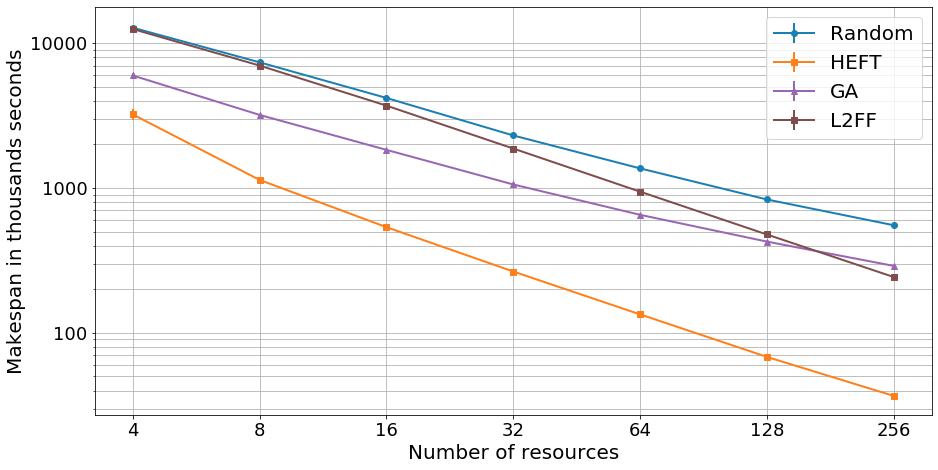

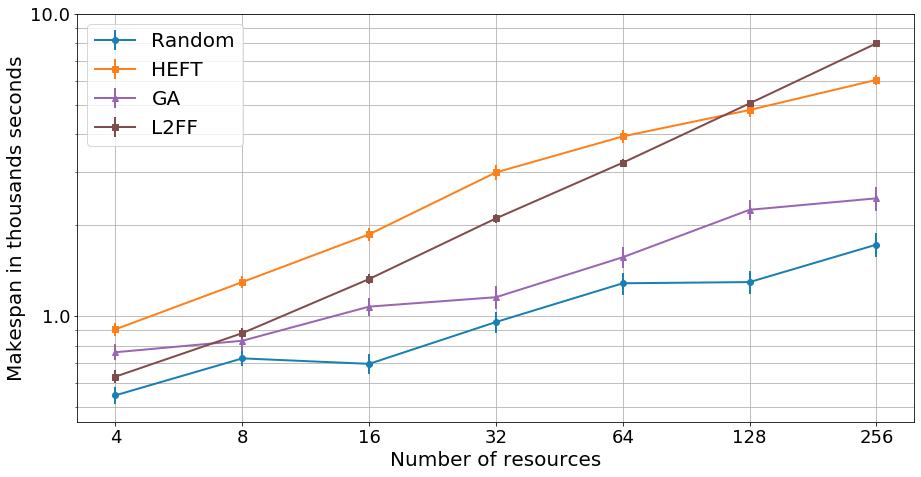

In [13]:
fig,axis = plt.subplots(nrows=1,ncols=1,figsize=(15,7.5))
_ = axis.errorbar(DynHeteroResources_StHeteroCampaignsRAND_means.index, DynHeteroResources_StHeteroCampaignsRAND_means['makespan'].values, DynHeteroResources_StHeteroCampaignsRAND_stds['makespan'].values / 10, color=tableau20(0),marker='o',label='Random',linewidth=2)
_ = axis.errorbar(DynHeteroResources_StHeteroCampaignsHEFT_means.index, DynHeteroResources_StHeteroCampaignsHEFT_means['makespan'].values, DynHeteroResources_StHeteroCampaignsHEFT_stds['makespan'].values / 10, marker='s',label='HEFT', color=tableau20(2),linewidth=2)
_ = axis.errorbar(DynHeteroResources_StHeteroCampaignsGA50_means.index, DynHeteroResources_StHeteroCampaignsGA50_means['makespan'].values, DynHeteroResources_StHeteroCampaignsGA50_stds['makespan'].values / 10, color=tableau20(8),marker='^',label='GA',linewidth=2)
_ = axis.errorbar(DynHeteroResources_StHeteroCampaignsL2FF_means.index, DynHeteroResources_StHeteroCampaignsL2FF_means['makespan'].values, DynHeteroResources_StHeteroCampaignsL2FF_stds['makespan'].values / 10, marker='s',label='L2FF', color=tableau20(10),linewidth=2)
# _ = axis.errorbar([4, 8, 16, 32, 64, 128], ideal, linestyle='--',label='Expected', color=greys(150),linewidth=2)
# _ = axis.fill_between(workflows_sizes, min_vals, max_vals, color=greens(250), alpha=0.2, label='RANDOM Max-Min')
_ = axis.set_yscale('log')
_ = axis.set_xscale('symlog',basex=2)
_ = axis.set_ylabel('Makespan in thousands seconds',fontsize=20)
_ = axis.set_xlabel('Number of resources',fontsize=20)
_ = axis.set_xticklabels(axis.get_xticks().astype('int').tolist(),fontsize=18)
_ = axis.set_yticklabels((axis.get_yticks()/1000).astype('int').tolist(),fontsize=18)
_ = axis.grid('on', which='both')
#_ = axis.set_title('As a function of the number of resources', fontsize=22)
_ = axis.legend(fontsize=20)
#_ = fig.savefig('../Figures/StHomoResources_StHomoCampaigns.pdf',bbox_inches='tight')
#fig.savefig('StHomoResources_StHomoCampaigns.pdf',bbox_inches='tight')

fig,axis = plt.subplots(nrows=1,ncols=1,figsize=(15,7.5))
_ = axis.errorbar(DynHeteroResources_StHeteroCampaignsRAND_means.index, DynHeteroResources_StHeteroCampaignsRAND_means['mpn_snt_norm'].values, DynHeteroResources_StHeteroCampaignsRAND_stds['mpn_snt_norm'].values / 10, color=tableau20(0),marker='o',label='Random',linewidth=2)
_ = axis.errorbar(DynHeteroResources_StHeteroCampaignsHEFT_means.index, DynHeteroResources_StHeteroCampaignsHEFT_means['mpn_snt_norm'].values, DynHeteroResources_StHeteroCampaignsHEFT_stds['mpn_snt_norm'].values / 10, marker='s',label='HEFT', color=tableau20(2),linewidth=2)
_ = axis.errorbar(DynHeteroResources_StHeteroCampaignsGA50_means.index, DynHeteroResources_StHeteroCampaignsGA50_means['mpn_snt_norm'].values, DynHeteroResources_StHeteroCampaignsGA50_stds['mpn_snt_norm'].values / 10, color=tableau20(8),marker='^',label='GA',linewidth=2)
_ = axis.errorbar(DynHeteroResources_StHeteroCampaignsL2FF_means.index, DynHeteroResources_StHeteroCampaignsL2FF_means['mpn_snt_norm'].values, DynHeteroResources_StHeteroCampaignsL2FF_stds['mpn_snt_norm'].values / 10, marker='s',label='L2FF', color=tableau20(10),linewidth=2)
# _ = axis.errorbar([4, 8, 16, 32, 64, 128], ideal, linestyle='--',label='Expected', color=greys(150),linewidth=2)
# _ = axis.fill_between(workflows_sizes, min_vals, max_vals, color=greens(250), alpha=0.2, label='RANDOM Max-Min')
_ = axis.set_yscale('log')
_ = axis.set_xscale('symlog',basex=2)
_ = axis.set_yticks([0.01,0.1])
_ = axis.set_ylabel('Makespan in thousands seconds',fontsize=20)
_ = axis.set_xlabel('Number of resources',fontsize=20)
_ = axis.set_xticklabels(axis.get_xticks().astype('int').tolist(),fontsize=18)
_ = axis.set_yticklabels(axis.get_yticks() * 100,fontsize=18)
_ = axis.grid('on', which='both')
#_ = axis.set_title('As a function of the number of resources', fontsize=22)
_ = axis.legend(fontsize=20)
#_ = fig.savefig('../Figures/StHomoResources_StHomoCampaigns.pdf',bbox_inches='tight')
#fig.savefig('StHomoResources_StHomoCampaigns.pdf',bbox_inches='tight')

In [11]:
DynHeteroResources_StHeteroCampaignsHEFT = pd.read_csv('../Data/heft/DynHeteroResources_StHeteroCampaignsHEFT_new.csv')

In [12]:
for i in range(100):
    test = DynHeteroResources_StHeteroCampaignsHEFT.loc[i]
    plan = eval(test['plan'])
    res = list()
    for placement in plan:
        res_perf = placement[1]['performance']
        if res_perf not in res:
            res.append(res_perf)
    print(res)

[10.68, 2.76, 1.3]
[10.68, 2.76, 1.3]
[10.68, 2.76, 1.3]
[23.516, 1.3]
[23.516, 1.3]
[23.516, 10.68, 2.76]
[2.76, 1.3]
[23.516, 2.76]
[10.68, 2.76, 1.3]
[10.68, 1.3]
[23.516, 10.68, 2.76, 1.3]
[23.516, 10.68, 1.3]
[23.516, 10.68, 2.76]
[23.516, 2.76, 1.3]
[23.516, 10.68, 2.76, 1.3]
[23.516, 2.76, 1.3]
[23.516, 10.68, 2.76]
[10.68, 2.76, 1.3]
[10.68, 2.76, 1.3]
[23.516, 2.76, 1.3]
[23.516, 10.68, 1.3]
[10.68, 2.76]
[23.516, 10.68, 2.76]
[23.516, 10.68, 1.3]
[23.516, 10.68, 1.3]
[10.68, 2.76]
[23.516, 10.68, 1.3]
[23.516, 10.68, 2.76]
[2.76, 1.3]
[10.68, 2.76, 1.3]
[2.76, 1.3]
[10.68, 2.76, 1.3]
[23.516, 10.68, 1.3]
[10.68, 2.76, 1.3]
[10.68, 1.3]
[23.516, 2.76, 1.3]
[23.516, 10.68, 1.3]
[10.68, 1.3]
[23.516, 1.3]
[23.516, 10.68]
[23.516, 10.68, 2.76]
[10.68, 1.3]
[23.516, 10.68, 2.76, 1.3]
[23.516, 10.68, 2.76, 1.3]
[10.68, 2.76]
[1.3]
[23.516, 10.68, 2.76]
[1.3]
[10.68, 2.76, 1.3]
[2.76, 1.3]
[23.516, 2.76, 1.3]
[23.516]
[23.516, 10.68, 1.3]
[10.68, 2.76, 1.3]
[10.68, 2.76, 1.3]
[10.68